In [4]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from pandas_datareader import data as pdr
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import datetime as dt
import yfinance as  yf

In [5]:
# list of Indian Stocks
stock = pd.read_csv('EQUITY_L.csv')
stock

,SYMBOL,Unnamed: 1
0,20MICRONS.NS,NaN
1,21STCENMGM.NS,NaN
2,3IINFOLTD.NS,NaN
3,3PLAND.NS,3MINDIA
4,4THDIM.NS,3PLAND
...,...,...
1860,ZUARI.NS,ZOTA
1861,ZUARIIND.NS,ZUARI
1862,ZYDUSLIFE.NS,ZUARIIND
1863,ZYDUSLIFE.NS,ZYDUSLIFE


In [6]:
# start = '2015-01-01'
# end = '2021-12-31'

# df = data.DataReader('ITC.NS', 'yahoo', start, end)
# df.head()

In [9]:
# df = df.reset_index()
# df.head()

In [7]:
# fetching indian stock data from yahoo finance

stock = 'ITC.NS'

# Define a start date and End Date
start = dt.datetime(2010,1,1)
end =  dt.datetime(2021,1,1)

# Read Stock Price Data 
df = yf.download(stock, start , end)
df.reset_index(inplace=True)

df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,84.333336,85.000000,83.449997,84.550003,62.331768,5161635
1,2010-01-05,84.933334,85.583336,84.233330,85.383331,62.946114,10767225
2,2010-01-06,86.233330,86.233330,84.533333,85.583336,63.093571,7529979
3,2010-01-07,85.666664,86.166664,84.566666,85.316666,62.896965,4987434
4,2010-01-08,85.116669,86.166664,85.116669,85.500000,63.032124,4881351
...,...,...,...,...,...,...,...
2708,2020-12-24,210.000000,210.649994,205.600006,208.600006,189.337494,22768284
2709,2020-12-28,209.000000,210.199997,207.850006,209.500000,190.154373,15741000
2710,2020-12-29,210.500000,213.500000,210.100006,211.550003,192.015076,26546469
2711,2020-12-30,212.699997,213.500000,209.550003,211.149994,191.651978,18925262


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2708,2020-12-24,210.000000,210.649994,205.600006,208.600006,189.337494,22768284
2709,2020-12-28,209.000000,210.199997,207.850006,209.500000,190.154373,15741000
2710,2020-12-29,210.500000,213.500000,210.100006,211.550003,192.015076,26546469
2711,2020-12-30,212.699997,213.500000,209.550003,211.149994,191.651978,18925262
2712,2020-12-31,210.550003,211.300003,208.550003,209.000000,189.700546,18245270


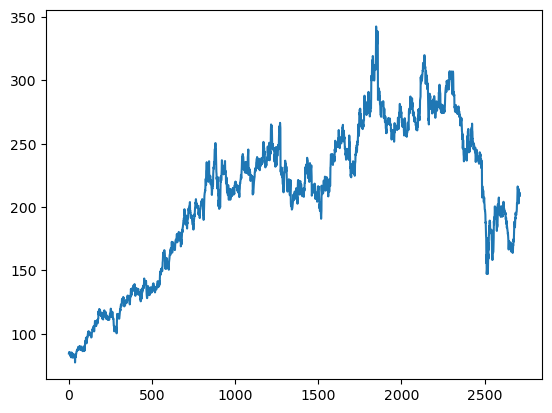

In [10]:
plt.plot(df.Close)

In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2708    186.3390
2709    186.5060
2710    186.6680
2711    186.8190
2712    186.9205
Name: Close, Length: 2713, dtype: float64

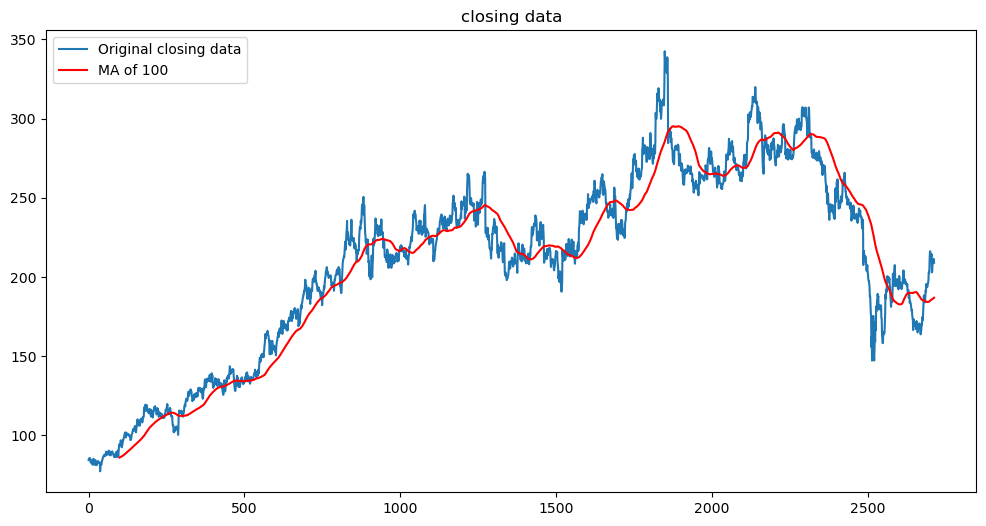

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.title("closing data")
plt.plot(ma100, "r")
plt.legend(["Original closing data", "MA of 100"],loc ="upper left")


In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2708    184.67125
2709    184.83275
2710    185.01225
2711    185.28900
2712    185.52275
Name: Close, Length: 2713, dtype: float64

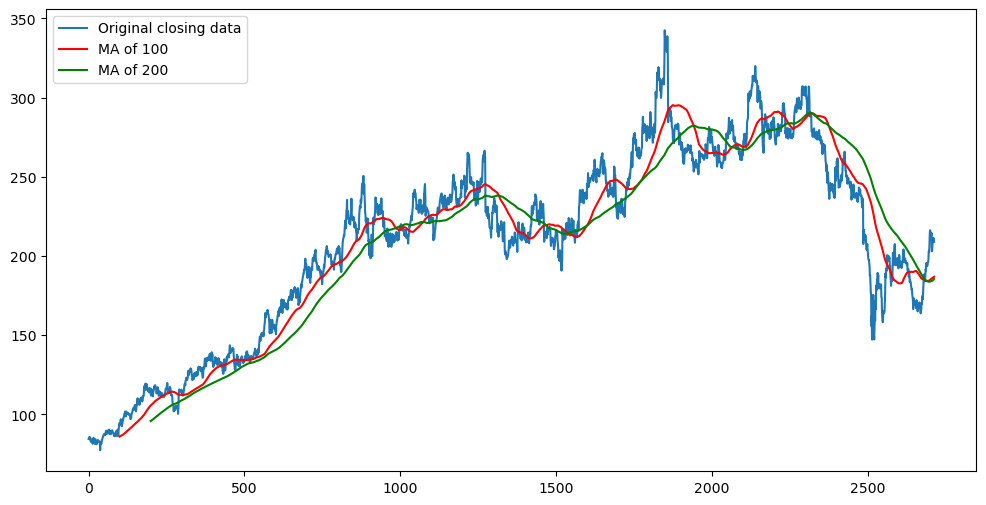

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, "r")
plt.plot(ma200, "g")
plt.legend(["Original closing data", "MA of 100","MA of 200"],loc ="upper left")

In [15]:
df.shape #shows rows and columns

(2713, 7)

In [16]:
#Splitting Data into Traning & Testing

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_train.shape)
print(data_test.shape)

(1899, 1)
(814, 1)


In [17]:
data_train.head() #Data stating form '0' index

,Close
0,84.550003
1,85.383331
2,85.583336
3,85.316666
4,85.500000


In [18]:
data_test.head() #remaning 30% of data

,Close
1899,272.000000
1900,269.299988
1901,267.000000
1902,267.850006
1903,271.549988


In [19]:
from sklearn.preprocessing import MinMaxScaler #for the stacked LSTM model we have to scale down the data 
scalar = MinMaxScaler(feature_range=(0,1)) #scaling down the data between (0,1)

In [20]:
#Fitting the traning data into min-max scaler & also will be convertig into array

data_training_array = scalar.fit_transform(data_train) #scaler.fit_transform will automatically give an array
data_training_array 


array([[0.0269098 ],
       [0.03005344],
       [0.03080794],
       ...,
       [0.74008176],
       [0.75535993],
       [0.7321597 ]])

In [21]:
# plooting the shape 
data_training_array.shape

(1899, 1)

In [22]:
#have to divide the data into x_train & y_train

x_train = []
y_train = []

#logic for predict the values

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i]) #added the values in x_train
    y_train.append(data_training_array[i, 0]) #added the values in y_train

x_train, y_train = np.array(x_train), np.array(y_train) #converting x_train & y_train into numpy arrays, so that we should be able to provide the data to LSTM

#dividing the dataset 
#x_train
#y_train

In [23]:
x_train.shape #100 coloums? how the 100 coloumns because we have define the step as 100 that means the first 100 values have become the coloumns because they have to act as the features for predecting my y_train so that y 100 will be in input_shape = 100 in my model

(1799, 100, 1)

In [24]:
#importing libs

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [25]:
#creating sequentual model
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,      
               input_shape = (x_train.shape[1],1))) #so why at 1 because the 100 is present at index '1' and '1' is nothing but the no. of colms & and it will change if working with 3 or 4 that no.will come in place of "1"
model.add(Dropout(0.2))



model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))   


          
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1)) #1 is for closing only for no. of units just increase the no.


In [26]:
model.summary() #summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer='adam', loss = 'mean_squared_error') #compiling the model 
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
57/57 [==============================] - 32s 355ms/step - loss: 0.0492
Epoch 2/50
57/57 [==============================] - 20s 352ms/step - loss: 0.0088
Epoch 3/50
57/57 [==============================] - 20s 352ms/step - loss: 0.0075
Epoch 4/50
57/57 [==============================] - 20s 350ms/step - loss: 0.0074
Epoch 5/50
57/57 [==============================] - 20s 345ms/step - loss: 0.0072
Epoch 6/50
57/57 [==============================] - 20s 352ms/step - loss: 0.0064
Epoch 7/50
57/57 [==============================] - 20s 350ms/step - loss: 0.0059
Epoch 8/50
57/57 [==============================] - 20s 345ms/step - loss: 0.0063
Epoch 9/50
57/57 [==============================] - 20s 349ms/step - loss: 0.0058
Epoch 10/50
57/57 [==============================] - 20s 347ms/step - loss: 0.0057
Epoch 11/50
57/57 [==============================] - 20s 346ms/step - loss: 0.0049
Epoch 12/50
57/57 [==============================] - 20s 347ms/step - loss: 0.0048
Epoch 13/50
5

In [28]:
model.save('keras_model.h5') #saving the model 

In [29]:
data_test.head() #testing data 

,Close
1899,272.000000
1900,269.299988
1901,267.000000
1902,267.850006
1903,271.549988


In [30]:
data_train.tail(100) #So these is the last'100' days data which i have to append with the Testing data so i should be able to predict the values to '99'days

,Close
1799,274.350006
1800,276.750000
1801,281.299988
1802,290.899994
1803,285.799988
...,...
1894,270.399994
1895,272.350006
1896,273.600006
1897,277.649994


In [31]:
past_100_days = data_train.tail(100)

In [32]:
final_df = past_100_days.append(data_test, ignore_index=True) #in past_100_days i have append the data testing so now last 100days dt & dt are connected

final_df.head()

C:\Users\Jaimin Shah\AppData\Local\Temp\ipykernel_9892\2385740392.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test, ignore_index=True) #in past_100_days i have append the data testing so now last 100days dt & dt are connected


,Close
0,274.350006
1,276.750000
2,281.299988
3,290.899994
4,285.799988


In [33]:
#so again i have to apply min-max sacaler cause this data is not scaled down

input_data = scalar.fit_transform(final_df)
input_data


array([[6.50960339e-01],
       [6.63252241e-01],
       [6.86555635e-01],
       [7.35723400e-01],
       [7.09603010e-01],
       [6.69654289e-01],
       [6.75800319e-01],
       [6.65813060e-01],
       [6.86043596e-01],
       [6.65300865e-01],
       [6.43790075e-01],
       [6.36363636e-01],
       [6.48911714e-01],
       [6.62740046e-01],
       [6.54033353e-01],
       [6.69398270e-01],
       [6.97567284e-01],
       [6.88348240e-01],
       [6.69142094e-01],
       [7.11651791e-01],
       [8.00768277e-01],
       [7.83098560e-01],
       [7.81818151e-01],
       [7.82586365e-01],
       [8.28937291e-01],
       [8.63508354e-01],
       [8.40973174e-01],
       [8.42765622e-01],
       [8.55057681e-01],
       [8.80665876e-01],
       [8.71703007e-01],
       [8.38924393e-01],
       [8.45070423e-01],
       [8.41741388e-01],
       [8.13060179e-01],
       [8.04865526e-01],
       [8.09218950e-01],
       [7.81562131e-01],
       [7.92061428e-01],
       [8.17157428e-01],


In [34]:
input_data.shape

(914, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]): #the range will go till '630'
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0]) # it is the '0'th coloumn, that is closing price coloumn
    

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)#converting to numpy array
print(x_test.shape)
print(y_test.shape)

(814, 100, 1)
(814,)


In [37]:
#Making predictions 

y_predicated = model.predict(x_test)


26/26 [==============================] - 5s 118ms/step


In [38]:
y_predicated.shape

(814, 1)

In [39]:
y_test

array([6.38924456e-01, 6.25095968e-01, 6.13316261e-01, 6.17669686e-01,
       6.36619656e-01, 6.26376378e-01, 6.20742700e-01, 5.88988476e-01,
       5.90012867e-01, 5.69782330e-01, 5.85403267e-01, 5.68757940e-01,
       5.84635052e-01, 6.15364886e-01, 6.04353393e-01, 6.08962837e-01,
       6.18437900e-01, 6.09219013e-01, 6.05121608e-01, 6.13316261e-01,
       6.07938603e-01, 6.15877081e-01, 6.14596671e-01, 6.30473783e-01,
       6.26888573e-01, 6.13572281e-01, 6.13316261e-01, 6.24839949e-01,
       6.20486524e-01, 6.25352144e-01, 6.03841198e-01, 6.06658193e-01,
       6.27912963e-01, 6.06402017e-01, 6.05121608e-01, 6.02560788e-01,
       6.04609413e-01, 6.05121608e-01, 5.77720808e-01, 5.86171637e-01,
       5.68757940e-01, 5.59795072e-01, 5.43149824e-01, 5.52368789e-01,
       5.67221511e-01, 5.73367540e-01, 5.55953921e-01, 5.67989725e-01,
       5.67989725e-01, 5.81306018e-01, 5.73623560e-01, 5.62099872e-01,
       5.67477530e-01, 5.57234252e-01, 5.52880906e-01, 5.52368789e-01,
      

In [40]:
y_predicated

array([[0.63674235],
       [0.63130873],
       [0.626449  ],
       [0.62162626],
       [0.61685383],
       [0.61294913],
       [0.610148  ],
       [0.60824406],
       [0.60602117],
       [0.6028739 ],
       [0.5982886 ],
       [0.5928101 ],
       [0.5867352 ],
       [0.58090436],
       [0.5768237 ],
       [0.57496154],
       [0.5752402 ],
       [0.57742286],
       [0.5807382 ],
       [0.58427644],
       [0.58758074],
       [0.5902505 ],
       [0.5923005 ],
       [0.593787  ],
       [0.5952094 ],
       [0.5967625 ],
       [0.59806025],
       [0.59878045],
       [0.59912694],
       [0.599211  ],
       [0.5992497 ],
       [0.5987803 ],
       [0.59760517],
       [0.5964398 ],
       [0.5951959 ],
       [0.5937388 ],
       [0.5919982 ],
       [0.5901184 ],
       [0.58831525],
       [0.5859668 ],
       [0.5830462 ],
       [0.57935035],
       [0.57474864],
       [0.569035  ],
       [0.562736  ],
       [0.55678755],
       [0.55214715],
       [0.548

In [41]:
# so all the values are scale down, so again i have to scale-up the values 

scalar.scale_   #this will give me the factor by which all these valuse were scale down

array([0.00512164])

In [46]:
# so i need to divide my y_predicated and y_test value by this factor on '0' location

scale_factor = 1/0.00512164
y_predicated = y_predicated * scale_factor
y_test = y_test * scale_factor


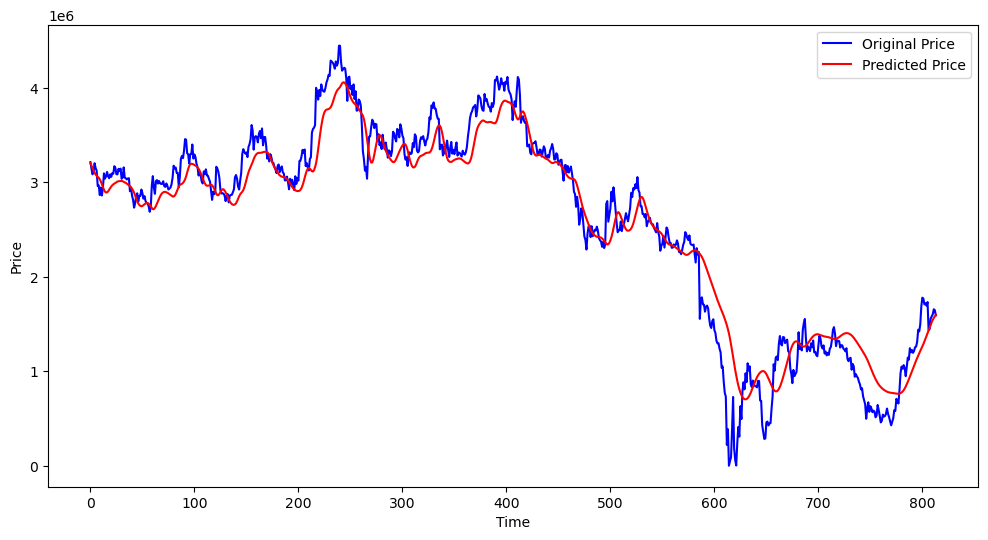

In [47]:
# Plotting the original vs predicted price 
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicated, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()